### APPLE STOCK ANALYSIS(2010-2021) - DEEP LEARNING


- LSTM DEEP LEARNING METHOD 

- RISK vs EXPECTED RETURN

- GOOGLE STOCK MARKET 

In [1]:
#Libraries
import tensorflow
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

Downloading data from Yahoo Finance from 2000 to recent date.

In [2]:
df_app=yf.download('AAPL',start="2000-12-01", end="2021-06-14",interval = "1d")

[*********************100%***********************]  1 of 1 completed


Understanding the data set: info, describe, shape.

In [3]:
df_app.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-12-01    0.303571    0.312500    0.300223    0.304688    0.262002   
2000-12-04    0.306920    0.306920    0.293527    0.297991    0.256243   
2000-12-05    0.302455    0.311384    0.292411    0.303571    0.261042   
2000-12-06    0.261161    0.267857    0.250000    0.255580    0.219774   
2000-12-07    0.257813    0.265625    0.250000    0.255580    0.219774   
...                ...         ...         ...         ...         ...   
2021-06-07  126.169998  126.320000  124.830002  125.900002  125.900002   
2021-06-08  126.599998  128.460007  126.209999  126.739998  126.739998   
2021-06-09  127.209999  127.750000  126.519997  127.129997  127.129997   
2021-06-10  127.019997  128.190002  125.940002  126.110001  126.110001   
2021-06-11  126.529999  127.440002  126.099998  127.349998  127.349998   

     

In [4]:
df_app.shape

(5163, 6)

In [5]:
df_app.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5.163000e+03
mean,21.888878,22.120335,21.649216,21.892092,20.801713,4.362705e+08
std,28.581270,28.908579,28.229153,28.577033,28.448594,3.816166e+08
min,0.231964,0.235536,0.227143,0.234286,0.201463,3.934000e+07
25%,2.218928,2.259822,2.191607,2.222322,1.910981,1.637380e+08
50%,12.040357,12.176786,11.939643,12.072857,10.381486,3.216808e+08
75%,29.153750,29.373750,28.912500,29.127500,27.098292,5.889422e+08
max,143.600006,145.089996,141.369995,143.160004,142.704010,3.372970e+09


In [6]:
#df_app.head()
df_app=df_app.reset_index()
df_app.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-12-01,0.303571,0.312500,0.300223,0.304688,0.262002,385705600
1,2000-12-04,0.306920,0.306920,0.293527,0.297991,0.256243,371520800
2,2000-12-05,0.302455,0.311384,0.292411,0.303571,0.261042,613978400
3,2000-12-06,0.261161,0.267857,0.250000,0.255580,0.219774,1374464000
4,2000-12-07,0.257813,0.265625,0.250000,0.255580,0.219774,408917600


In [7]:
#Calculating daily change using percentage change in Adjusting closing price
df_app['Daily Change']=df_app['Adj Close'].pct_change()
rets=df_app['Adj Close']

### Calculating Risk Vs Expected Return of Apple stocks. 

Expected return and standard deviation are two statistical measures that can be used to analyze a portfolio. The expected return of a portfolio is the anticipated amount of returns that a portfolio may generate, whereas the standard deviation of a portfolio measures the amount that the returns deviate from its mean.
- https://www.investopedia.com/ask/answers/042815/what-difference-between-expected-return-and-standard-deviation-portfolio.asp

Relating Standard Deviation to Risk
In investing, standard deviation is used as an indicator of market volatility and, therefore, of risk. The more unpredictable the price action and the wider the range, the greater the risk.
- https://www.investopedia.com/ask/answers/021915/how-standard-deviation-used-determine-risk.asp

Text(25, 25, 'Adj Close')

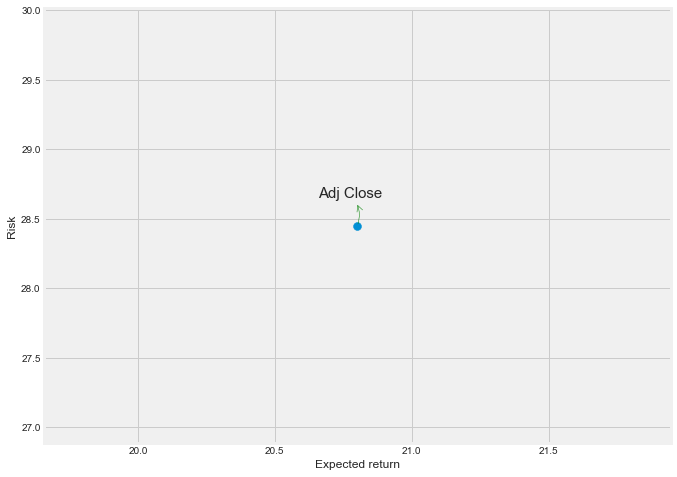

In [8]:
area = np.pi*20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

x=rets.mean()
y=rets.std()

#plt.annotate(,(x,y))
SMALL_SIZE = 10
MEDIUM_SIZE = 20
BIGGER_SIZE = 40

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize


plt.annotate("Adj Close", xy=(x, y), xytext=(25, 25), textcoords='offset points', ha='right', va='bottom', 
             arrowprops=dict(arrowstyle='<-', color='green', connectionstyle='arc3,rad=-0.3'))

In [9]:
print (rets.mean(),rets.std())

20.801712988724827 28.448593770949252


Risk Return Trade off:
Higher risk is associated with greater probability of higher return and lower risk with a greater probability of smaller return. Apple stock dont seem to have high risk and hence the expected return. Apple has been a buy stock as it has shown a upward trend for sometime now and also it hit the 2 Trillion mark in middle of a global pandemic. 

#### LSTM Method for Stock Prediction:

Long Short Term Method is a type of deep learning method which is used for stock price prediction. We will test Vanilla LSTM and Stacked LSTM for this project. 

- Vanilla LSTM - It has only one hidden layer. The output layer is used to make prediction.
- Stacked LSTM - It has multiple hidden layers which makes the model more deeper.

The difference between the two for programming purposes is setting return_sequences argument on the layer to True. This will return one output for each input time step. 

In [10]:
#Create a new dataframe with only the 'Close column
data = df_app.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

4131

In [11]:
dataset.shape

(5163, 1)

LSTM is capable of learning long term dependencies. They remember information. The core idea of LSTM if that it can add or remove information to cell states through gates.These dates are optional and composed out of a sigmoid neural net layer and pointwise multiplication operation.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [12]:

#MinMaxScaler - Transform features by scaling each feature to a given range. Here between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.92577630e-04],
       [4.45721129e-04],
       [4.84762236e-04],
       ...,
       [8.87843793e-01],
       [8.80707242e-01],
       [8.89383062e-01]])

LSTMs expect our data to be in a specific format, usually a 3D array. We start by creating data in 60 timesteps and converting it into an array using NumPy. Next, we convert the data into a 3D dimension array with X_train samples, 60 timestamps, and one feature at each step.

https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

In [13]:
#Creating training data
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [17]:
#Create the testing data set
#Create a new array containing scaled values from index 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [18]:
dataset.shape

(5163, 1)

#### MODEL 1

- Sequential for initializing the neural network
- Dense for adding a densely connected neural network layer
- LSTM for adding the Long Short-Term Memory layer
- Dropout for adding dropout layers that prevent overfitting

The Dense layer that specifies the output of 1 unit(25 units). return_sequences=True which determines whether to return the last output in the output sequence, or the full sequence. input_shape as the shape of our training set. 50 units which is the dimensionality of the output space. compile model using the popular adam optimizer and set the loss as the mean_squarred_error. This will compute the mean of the squared errors. the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped.

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

#Build the LSTM model 1
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
model.add(Dropout(0.2))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

#Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=1)

4071/4071 [==============================] - 81s 20ms/step - loss: 0.0019 - accuracy: 2.4564e-04


Difference between batch and epoch:
- The batch size is a number of samples processed before the model is updated.The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.
- The number of epochs is the number of complete passes through the training dataset. The number of epochs can be set to an integer value between one and infinity. You can run the algorithm for as long as you like and even stop it using other criteria besides a fixed number of epochs, such as a change (or lack of change) in model error over time.

https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

Creating a Test Data Set to Predict. Root Mean Square Error is calculated for the predictions.

RMSE is difference between the actual and predicted value. This value can be positive or negative. Hence it is squared and average is taken as error. The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

In [20]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

20.125167727822284

Expected and Predicted values are plotted together. We plot validation and predicted set. Apart from accuracy of the prediction we should also see if the trend of the predicted prices is same as the actual prices.

<ipython-input-21-5b5f4769aa00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


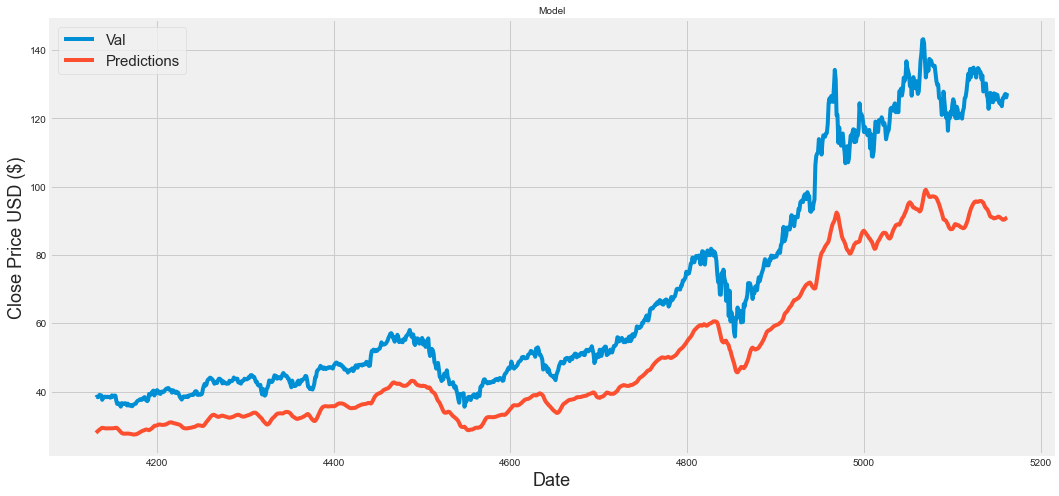

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='upper left',fontsize=15)
plt.show()

Leaving out the training set from plot, we see a more clear plot of predicted and actual closing prices. The model has correctly predcited the trend of the price. The highs and lows are very accurate. The RMSE is  which is low. We need to plot the loss of validation and training dataset. This will give bettwe understanding of the model. We will be able to identify if the model is overfit or underfit. Sometimes these graphs show if model requires more feature engineering.

#### Model 2: More LSTM layers are added 

In [22]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape= (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

New model with loss set to binary crossentropy. Other metrics remain the same. We will do a prediction for this model just as previous one. We will compare RMSE, stock prediction plots, train vs validation dataset plots for two models.

In [23]:
regressor.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = regressor.fit(x_train, y_train, batch_size=1, epochs=1,validation_split=0.33)
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

2727/2727 [==============================] - 134s 49ms/step - loss: 0.2328 - accuracy: 3.6670e-04 - val_loss: 2.5657 - val_accuracy: 0.0000e+00
[0.23283088207244873]
[0.0003667033452074975]
[2.565720558166504]
[0.0]


In [24]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

20.125167727822284

<ipython-input-25-5b5f4769aa00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


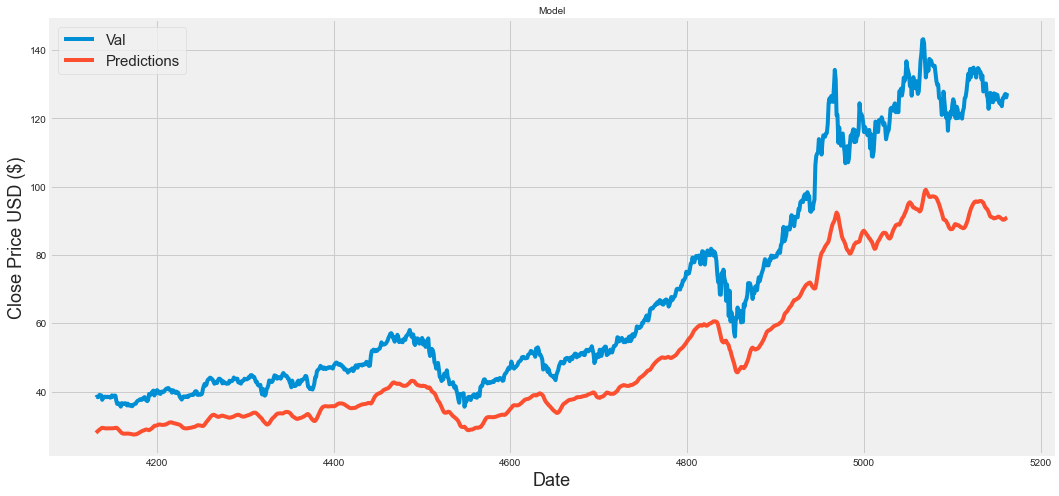

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='upper left',fontsize=15)
plt.show()

In [26]:
df_goog=yf.download('GOOG',start="2000-12-01", end="2021-06-14",interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [27]:
df_goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [29]:
data_g=df_goog.filter(['Close'])
dataset_g=data_g.values

goog_len=int(len(df_goog))
goog_len

4233

In [30]:
#MinMaxScaler - Transform features by scaling each feature to a given range. Here between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_g = scaler.fit_transform(dataset_g)

scaled_data_g

array([[6.65053636e-05],
       [1.67268096e-03],
       [1.89234636e-03],
       ...,
       [9.87782014e-01],
       [1.00000000e+00],
       [9.96896908e-01]])

In [31]:
#Create the testing data set
#Create a new array containing scaled values from index 
test_data = scaled_data_g[:goog_len , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset_g[60:goog_len, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [32]:
# Convert the data to a numpy array
x_test = np.array(x_test)
x_test.shape
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [34]:
# Get the models predicted price values 
predictions_goog = model.predict(x_test)
predictions_goog = scaler.inverse_transform(predictions_goog)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions_goog - y_test) ** 2)))
rmse

188.55169511030263

In [35]:
predictions_goog.shape

(4173, 1)

<ipython-input-36-666cfce4e70f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_g['Predictions'] = predictions_goog


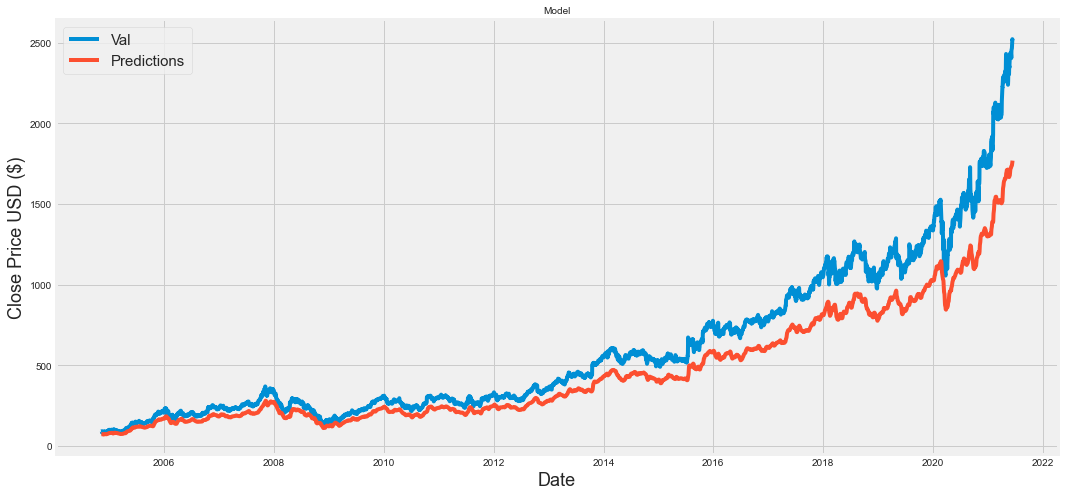

In [36]:
# Plot the data
valid_g = data_g[60:goog_len]
valid_g['Predictions'] = predictions_goog

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train)
plt.plot(valid_g[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='upper left',fontsize=15)
plt.show()

In [37]:
rets=df_goog['Adj Close']

Text(25, 25, 'Adj Close')

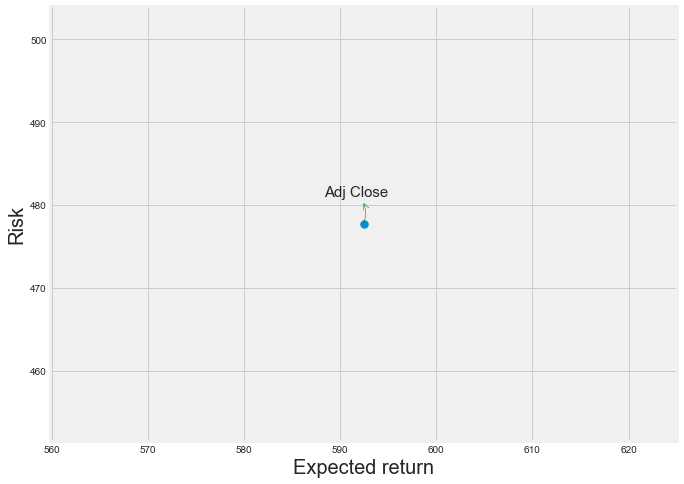

In [38]:
area = np.pi*20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

x=rets.mean()
y=rets.std()

#plt.annotate(,(x,y))
SMALL_SIZE = 10
MEDIUM_SIZE = 20
BIGGER_SIZE = 40

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize


plt.annotate("Adj Close", xy=(x, y), xytext=(25, 25), textcoords='offset points', ha='right', va='bottom', 
             arrowprops=dict(arrowstyle='<-', color='green', connectionstyle='arc3,rad=-0.3'))

In [39]:
print (rets.mean(),rets.std())

592.4362115776626 477.7223261195383
